# **Nombre:** Miller Alexis Quintero García

**Observación:** Personalmente modifiqué ligeramente un poco esta sección inicial de preparación de los datos, para tener mayor noción de que es lo que tengo, obtener un poco más de información, visualizar los dataframes en cada etapa y revisar si existe algún desbalanceo en los datos. Todo lo comenté ya sea con comentarios de línea en Python, o con texto en celdas Markdown. 

En mi computador de escritorio que tiene un procesador AMD Ryzen 5 3400G, 16 GB de RAM y no tiene tarjeta gráfica, el notebook tardó aproximadamente 7 minutos en correr de inicio a fin.

De antemano, muchas gracias.

## EJERCICIO 1 - BÁSICO

El fichero `datos_pago_microcreditos.csv` contiene 30000 transacciones bancarias relativas al pago o impago de microcréditos. El dataset consta de 62 dimensiones propietarias de las cuales el banco no ha proporcionado información por confidencialidad, a parte de su valor. La matriz de entrada se encuentra en `x_train`, e `y_train` contiene la etiqueta relativa a esa transacción, un 1 indica que si se pago el microcrédito y un 0 que no se pago.

Considera que el tamaño del dataset es lo suficientemente grande como para que dependiendo de los recursos de la máquina, pueda tardar varios minutos en entrenar modelos complejos. 

Ejecuta el código inicial para estandarizar los datos y contestar las preguntas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_file='datos_pago_microcreditos.csv'

pdl = pd.read_csv(data_file)

In [3]:
pdl

,payment,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30
0,Success,qw,hk,3.11,16.06,-4.60,22.34,13.53,1.53,nv,...,8.94,-12.76,ub,12.06,2.46,4.73,-1.72,0.91,ev,8.00
1,Denied,qw,rv,3.35,11.18,-18.55,6.68,12.78,6.62,nv,...,31.02,34.76,cz,1.44,9.44,13.56,-2.24,0.24,ev,-2.90
2,Denied,qw,zg,4.15,29.19,18.91,16.40,3.67,5.72,ch,...,23.26,9.50,ri,7.77,8.70,-1.75,5.96,1.91,ev,22.67
3,Success,wv,js,6.23,15.70,2.81,4.46,5.13,8.66,ja,...,29.25,-1.53,ri,8.94,19.33,23.73,5.54,0.85,ev,36.31
4,Success,ma,xn,1.28,20.71,14.98,11.19,17.66,1.13,nv,...,2.19,10.24,ub,8.92,5.48,-0.28,4.01,1.21,ev,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Success,qw,zg,3.85,12.75,47.62,3.34,17.22,7.00,ch,...,25.00,18.14,tf,8.54,14.95,32.69,-3.71,1.20,ev,-7.12
29996,Denied,kq,bq,3.32,25.31,15.90,10.96,10.13,10.32,ch,...,26.49,22.88,qu,12.11,11.45,11.56,3.52,0.92,ev,13.28
29997,Denied,kq,js,2.98,19.28,16.20,-1.70,9.45,-8.44,ch,...,39.61,4.40,ub,7.75,1.65,17.83,9.67,-0.64,ev,31.07
29998,Success,qw,py,-0.30,16.41,22.80,-9.99,26.89,-1.10,ch,...,44.22,0.46,tf,11.50,5.90,20.33,4.17,0.78,ev,40.53


In [4]:
print(pdl.head())

   payment var1 var2  var3   var4   var5   var6   var7  var8 var9  ...  var21  \
0  Success   qw   hk  3.11  16.06  -4.60  22.34  13.53  1.53   nv  ...   8.94   
1   Denied   qw   rv  3.35  11.18 -18.55   6.68  12.78  6.62   nv  ...  31.02   
2   Denied   qw   zg  4.15  29.19  18.91  16.40   3.67  5.72   ch  ...  23.26   
3  Success   wv   js  6.23  15.70   2.81   4.46   5.13  8.66   ja  ...  29.25   
4  Success   ma   xn  1.28  20.71  14.98  11.19  17.66  1.13   nv  ...   2.19   

   var22  var23  var24  var25  var26  var27 var28  var29  var30  
0 -12.76     ub  12.06   2.46   4.73  -1.72  0.91     ev   8.00  
1  34.76     cz   1.44   9.44  13.56  -2.24  0.24     ev  -2.90  
2   9.50     ri   7.77   8.70  -1.75   5.96  1.91     ev  22.67  
3  -1.53     ri   8.94  19.33  23.73   5.54  0.85     ev  36.31  
4  10.24     ub   8.92   5.48  -0.28   4.01  1.21     ev  11.33  

[5 rows x 31 columns]


In [5]:
# Vemos si hay valores nulos
print(pdl.isnull().sum())
# Vemos si hay valores NaN
print(pdl.isna().sum())

payment    0
var1       0
var2       0
var3       0
var4       0
var5       0
var6       0
var7       0
var8       0
var9       0
var10      0
var11      0
var12      0
var13      0
var14      0
var15      0
var16      0
var17      0
var18      0
var19      0
var20      0
var21      0
var22      0
var23      0
var24      0
var25      0
var26      0
var27      0
var28      0
var29      0
var30      0
dtype: int64
payment    0
var1       0
var2       0
var3       0
var4       0
var5       0
var6       0
var7       0
var8       0
var9       0
var10      0
var11      0
var12      0
var13      0
var14      0
var15      0
var16      0
var17      0
var18      0
var19      0
var20      0
var21      0
var22      0
var23      0
var24      0
var25      0
var26      0
var27      0
var28      0
var29      0
var30      0
dtype: int64


In [6]:
print(pdl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   payment  30000 non-null  object 
 1   var1     30000 non-null  object 
 2   var2     30000 non-null  object 
 3   var3     30000 non-null  float64
 4   var4     30000 non-null  float64
 5   var5     30000 non-null  float64
 6   var6     30000 non-null  float64
 7   var7     30000 non-null  float64
 8   var8     30000 non-null  float64
 9   var9     30000 non-null  object 
 10  var10    30000 non-null  object 
 11  var11    30000 non-null  object 
 12  var12    30000 non-null  float64
 13  var13    30000 non-null  object 
 14  var14    30000 non-null  float64
 15  var15    30000 non-null  float64
 16  var16    30000 non-null  float64
 17  var17    30000 non-null  object 
 18  var18    30000 non-null  float64
 19  var19    30000 non-null  object 
 20  var20    30000 non-null  float64
 21  var21    300

In [7]:
print(pdl.describe())

               var3          var4          var5          var6          var7  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       3.018848     13.941943     19.981561      8.009453      9.110358   
std        3.004458     14.028019     19.866781      8.013395      8.976009   
min       -8.190000    -43.660000    -55.100000    -23.630000    -27.580000   
25%        0.990000      4.450000      6.520000      2.550000      3.050000   
50%        3.040000     13.920000     19.980000      8.010000      9.170000   
75%        5.040000     23.520000     33.452500     13.430000     15.152500   
max       15.160000     76.780000    107.080000     44.330000     48.390000   

               var8         var12         var14         var15         var16  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       5.993785      7.020662      2.007760     17.118747     10.919426   
std        6.035204      7.004504      2.001967    

In [8]:
# Convertir la columna "payment" a numérica considerando "Success" como 1 y cualquier otra cosa como 0 ("Denied")
pdl["payment"] = np.where(pdl["payment"] == "Success",1,0)
pdl

,payment,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30
0,1,qw,hk,3.11,16.06,-4.60,22.34,13.53,1.53,nv,...,8.94,-12.76,ub,12.06,2.46,4.73,-1.72,0.91,ev,8.00
1,0,qw,rv,3.35,11.18,-18.55,6.68,12.78,6.62,nv,...,31.02,34.76,cz,1.44,9.44,13.56,-2.24,0.24,ev,-2.90
2,0,qw,zg,4.15,29.19,18.91,16.40,3.67,5.72,ch,...,23.26,9.50,ri,7.77,8.70,-1.75,5.96,1.91,ev,22.67
3,1,wv,js,6.23,15.70,2.81,4.46,5.13,8.66,ja,...,29.25,-1.53,ri,8.94,19.33,23.73,5.54,0.85,ev,36.31
4,1,ma,xn,1.28,20.71,14.98,11.19,17.66,1.13,nv,...,2.19,10.24,ub,8.92,5.48,-0.28,4.01,1.21,ev,11.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,qw,zg,3.85,12.75,47.62,3.34,17.22,7.00,ch,...,25.00,18.14,tf,8.54,14.95,32.69,-3.71,1.20,ev,-7.12
29996,0,kq,bq,3.32,25.31,15.90,10.96,10.13,10.32,ch,...,26.49,22.88,qu,12.11,11.45,11.56,3.52,0.92,ev,13.28
29997,0,kq,js,2.98,19.28,16.20,-1.70,9.45,-8.44,ch,...,39.61,4.40,ub,7.75,1.65,17.83,9.67,-0.64,ev,31.07
29998,1,qw,py,-0.30,16.41,22.80,-9.99,26.89,-1.10,ch,...,44.22,0.46,tf,11.50,5.90,20.33,4.17,0.78,ev,40.53


In [9]:
columnas = pdl.columns
print(columnas)

Index(['payment', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23',
       'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30'],
      dtype='object')


In [10]:
for col in columnas:
    # Si la columna es de tipo 'object'...
    if pdl[col].dtype == 'object':
        # Creamos columnas dummy para cada valor único de la columna tipo 'object'
        temp = pd.get_dummies(pdl[col], drop_first = True, prefix=col)
        pdl = pd.concat([pdl, temp], axis=1)
        pdl.drop(col, axis=1, inplace=True)

pdl

,payment,var3,var4,var5,var6,var7,var8,var12,var14,var15,...,var23_da,var23_fe,var23_po,var23_qu,var23_ri,var23_sy,var23_tf,var23_ub,var23_yv,var29_ev
0,1,3.11,16.06,-4.60,22.34,13.53,1.53,4.46,4.93,26.48,...,False,False,False,False,False,False,False,True,False,True
1,0,3.35,11.18,-18.55,6.68,12.78,6.62,4.04,-0.76,16.21,...,False,False,False,False,False,False,False,False,False,True
2,0,4.15,29.19,18.91,16.40,3.67,5.72,-4.41,1.21,29.06,...,False,False,False,False,True,False,False,False,False,True
3,1,6.23,15.70,2.81,4.46,5.13,8.66,2.14,3.56,23.61,...,False,False,False,False,True,False,False,False,False,True
4,1,1.28,20.71,14.98,11.19,17.66,1.13,14.93,2.20,-19.16,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3.85,12.75,47.62,3.34,17.22,7.00,17.62,0.57,41.55,...,False,False,False,False,False,False,True,False,False,True
29996,0,3.32,25.31,15.90,10.96,10.13,10.32,13.03,4.40,49.51,...,False,False,False,True,False,False,False,False,False,True
29997,0,2.98,19.28,16.20,-1.70,9.45,-8.44,2.60,-0.67,20.66,...,False,False,False,False,False,False,False,True,False,True
29998,1,-0.30,16.41,22.80,-9.99,26.89,-1.10,6.07,4.13,49.06,...,False,False,False,False,False,False,True,False,False,True


In [11]:
# Descartamos filas con valores NaN, por si hay alguna
pdl.dropna(axis=0,inplace=True)
pdl

,payment,var3,var4,var5,var6,var7,var8,var12,var14,var15,...,var23_da,var23_fe,var23_po,var23_qu,var23_ri,var23_sy,var23_tf,var23_ub,var23_yv,var29_ev
0,1,3.11,16.06,-4.60,22.34,13.53,1.53,4.46,4.93,26.48,...,False,False,False,False,False,False,False,True,False,True
1,0,3.35,11.18,-18.55,6.68,12.78,6.62,4.04,-0.76,16.21,...,False,False,False,False,False,False,False,False,False,True
2,0,4.15,29.19,18.91,16.40,3.67,5.72,-4.41,1.21,29.06,...,False,False,False,False,True,False,False,False,False,True
3,1,6.23,15.70,2.81,4.46,5.13,8.66,2.14,3.56,23.61,...,False,False,False,False,True,False,False,False,False,True
4,1,1.28,20.71,14.98,11.19,17.66,1.13,14.93,2.20,-19.16,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3.85,12.75,47.62,3.34,17.22,7.00,17.62,0.57,41.55,...,False,False,False,False,False,False,True,False,False,True
29996,0,3.32,25.31,15.90,10.96,10.13,10.32,13.03,4.40,49.51,...,False,False,False,True,False,False,False,False,False,True
29997,0,2.98,19.28,16.20,-1.70,9.45,-8.44,2.60,-0.67,20.66,...,False,False,False,False,False,False,False,True,False,True
29998,1,-0.30,16.41,22.80,-9.99,26.89,-1.10,6.07,4.13,49.06,...,False,False,False,False,False,False,True,False,False,True


In [12]:
pdl.columns

Index(['payment', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var12',
       'var14', 'var15', 'var16', 'var18', 'var20', 'var21', 'var22', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var30', 'var1_ma', 'var1_qw',
       'var1_wv', 'var2_hk', 'var2_js', 'var2_lo', 'var2_py', 'var2_qf',
       'var2_rv', 'var2_xn', 'var2_zg', 'var9_ja', 'var9_nv', 'var10_ld',
       'var10_pe', 'var11_te', 'var13_iz', 'var13_kh', 'var13_np', 'var13_pf',
       'var13_te', 'var13_xm', 'var17_bw', 'var17_ki', 'var17_ov', 'var17_zk',
       'var19_ev', 'var19_fh', 'var19_hw', 'var19_me', 'var19_qu', 'var19_tg',
       'var23_da', 'var23_fe', 'var23_po', 'var23_qu', 'var23_ri', 'var23_sy',
       'var23_tf', 'var23_ub', 'var23_yv', 'var29_ev'],
      dtype='object')

In [13]:
# Antes de dividir los datos, separamos las variables predictoras de la variable objetivo
X = pdl.drop(columns=['payment'])
y = pdl['payment']
# Vemos si existe algún desbalanceo en la variable objetivo
print(y.value_counts())

payment
0    18755
1    11245
Name: count, dtype: int64


In [14]:
X

,var3,var4,var5,var6,var7,var8,var12,var14,var15,var16,...,var23_da,var23_fe,var23_po,var23_qu,var23_ri,var23_sy,var23_tf,var23_ub,var23_yv,var29_ev
0,3.11,16.06,-4.60,22.34,13.53,1.53,4.46,4.93,26.48,10.48,...,False,False,False,False,False,False,False,True,False,True
1,3.35,11.18,-18.55,6.68,12.78,6.62,4.04,-0.76,16.21,-0.87,...,False,False,False,False,False,False,False,False,False,True
2,4.15,29.19,18.91,16.40,3.67,5.72,-4.41,1.21,29.06,5.49,...,False,False,False,False,True,False,False,False,False,True
3,6.23,15.70,2.81,4.46,5.13,8.66,2.14,3.56,23.61,15.34,...,False,False,False,False,True,False,False,False,False,True
4,1.28,20.71,14.98,11.19,17.66,1.13,14.93,2.20,-19.16,-3.00,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3.85,12.75,47.62,3.34,17.22,7.00,17.62,0.57,41.55,19.06,...,False,False,False,False,False,False,True,False,False,True
29996,3.32,25.31,15.90,10.96,10.13,10.32,13.03,4.40,49.51,5.56,...,False,False,False,True,False,False,False,False,False,True
29997,2.98,19.28,16.20,-1.70,9.45,-8.44,2.60,-0.67,20.66,5.44,...,False,False,False,False,False,False,False,True,False,True
29998,-0.30,16.41,22.80,-9.99,26.89,-1.10,6.07,4.13,49.06,23.66,...,False,False,False,False,False,False,True,False,False,True


In [15]:
y

0        1
1        0
2        0
3        1
4        1
        ..
29995    1
29996    0
29997    0
29998    1
29999    1
Name: payment, Length: 30000, dtype: int64

Como existe un desbalance entre los datos de microcréditos no pagados ('Denied' = 0) y los que sí se pagaron ('Sucess' = 1), dividimos los datos considerando este desbalanceo con el argumento de `stratify = y` en la función `train_test_split` lo cual hace que los datos se dividan según la proporción del desbalance.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2, stratify = y)

# Ahora reseteamos los índices de los dataframes
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [17]:
x_train

,var3,var4,var5,var6,var7,var8,var12,var14,var15,var16,...,var23_da,var23_fe,var23_po,var23_qu,var23_ri,var23_sy,var23_tf,var23_ub,var23_yv,var29_ev
0,6.55,39.41,-19.81,15.72,10.82,6.97,4.98,-2.06,20.80,4.16,...,False,False,False,False,True,False,False,False,False,True
1,2.92,-10.44,8.82,14.30,19.61,11.51,14.23,4.29,12.73,13.62,...,False,True,False,False,False,False,False,False,False,False
2,3.23,-1.03,-19.09,0.16,11.39,15.00,3.63,2.45,24.30,0.58,...,False,False,False,True,False,False,False,False,False,True
3,2.32,-6.36,20.81,27.80,4.37,3.01,4.76,1.54,25.17,1.81,...,False,False,False,False,False,False,False,True,False,True
4,-0.43,23.41,-0.62,14.10,16.73,-2.97,5.65,2.64,16.25,8.77,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,2.41,14.45,-2.80,9.09,20.45,8.81,1.94,2.99,18.26,7.80,...,False,False,False,False,True,False,False,False,False,True
23996,4.48,23.66,-8.17,6.78,1.50,4.54,3.73,3.91,-5.69,-1.73,...,False,False,False,True,False,False,False,False,False,True
23997,-2.10,-16.22,34.29,5.36,8.19,21.36,7.41,2.07,0.48,25.85,...,False,False,False,False,False,False,False,False,False,True
23998,-0.59,0.54,15.35,9.20,-9.80,8.26,13.02,4.90,4.32,28.26,...,False,False,False,False,True,False,False,False,False,True


In [18]:
x_test

,var3,var4,var5,var6,var7,var8,var12,var14,var15,var16,...,var23_da,var23_fe,var23_po,var23_qu,var23_ri,var23_sy,var23_tf,var23_ub,var23_yv,var29_ev
0,-3.33,30.09,29.56,7.04,21.17,12.62,6.04,2.02,42.66,1.94,...,False,False,False,False,False,False,True,False,False,True
1,1.72,22.34,5.22,8.60,32.99,5.25,5.23,4.32,5.44,25.65,...,False,True,False,False,False,False,False,False,False,True
2,4.55,-2.90,29.00,5.76,17.16,11.33,5.14,-0.10,12.13,6.87,...,False,True,False,False,False,False,False,False,False,True
3,8.84,25.46,-17.07,8.73,10.29,-1.98,21.86,1.15,-9.80,22.23,...,True,False,False,False,False,False,False,False,False,True
4,6.06,-4.27,24.87,8.74,18.59,9.41,8.96,3.60,1.63,6.39,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5.48,2.37,20.48,18.24,9.04,1.41,0.15,1.04,37.18,8.08,...,False,True,False,False,False,False,False,False,False,True
5996,2.13,8.97,24.67,8.06,3.90,5.80,-9.22,3.20,25.53,12.92,...,False,False,False,False,False,False,True,False,False,True
5997,0.40,32.20,26.50,-5.33,7.32,3.57,19.97,1.38,45.71,29.84,...,True,False,False,False,False,False,False,False,False,False
5998,7.28,23.42,61.59,6.42,7.69,4.37,8.40,0.66,16.32,13.71,...,False,False,False,False,True,False,False,False,False,True


In [19]:
y_train

0        0
1        0
2        0
3        1
4        0
        ..
23995    0
23996    0
23997    0
23998    0
23999    0
Name: payment, Length: 24000, dtype: int64

In [20]:
y_test

0       0
1       1
2       0
3       1
4       0
       ..
5995    0
5996    0
5997    1
5998    0
5999    0
Name: payment, Length: 6000, dtype: int64

# Pregunta 1:
Construye un  clasificador usando K-NN con 3 vecinos y otro usando un árbol de decisión. ¿Cuál produce mejor resultado?. ¿Qué métrica has usado?. Según el árbol de decisión, ¿qué métricas son las más relevantes?

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Implementamos el clasificador KNN con los 3 vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Miramos el score del clasificador en train para revisar que no haya overfitting
train_score_knn = round(knn.score(x_train, y_train), 3)

if train_score_knn < 1:
    print("No hay overfitting, el score en train es: ", train_score_knn)
else:
    print("Hay overfitting, el score en train es: ", train_score_knn)

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(knn.score(x_test, y_test), 3))

No hay overfitting, el score en train es:  0.831
El score en test es: 0.672


In [23]:
# Implementamos el clasificador de Decission Tree
dt = DecisionTreeClassifier(random_state = 42).fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# Miramos el score del clasificador en train para revisar que no haya overfitting
train_score_dt = round(dt.score(x_train, y_train), 3)

if train_score_dt < 1:
    print("No hay overfitting, el score en train es:", train_score_dt)
else:
    print("Hay overfitting, el score en train es:", train_score_dt)
    print("La profundidad del árbol es:", dt.get_depth())

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(dt.score(x_test, y_test), 3))

Hay overfitting, el score en train es: 1.0
La profundidad del árbol es: 46
El score en test es: 0.782


A pesar de que el ejercicio no lo pide, es necesario regularizar el modelo de Decision Tree para evitar overfitting,
ya que el score en train es 1.0, lo que indica que el modelo ha aprendido de memoria los datos de entrenamiento. Por ello
compararlos en alguna otra métrica no tendría sentido, pues sería una desventaja para el KNN.

In [24]:
# Definimos de nuevo el Decision Tree con un max_depth

# Para esto tomamos la máxima profundidad del árbol de decisión con overfitting y tomamos un 80% de esa profundidad
max_depth = int(dt.get_depth()*0.8)
regularized_dt = DecisionTreeClassifier(max_depth = max_depth, random_state = 42).fit(x_train, y_train)
y_pred_regularized_dt = regularized_dt.predict(x_test)

# Miramos el score del clasificador en train para revisar que no haya overfitting
train_score_regularized_dt = round(regularized_dt.score(x_train, y_train), 3)

if train_score_regularized_dt < 1:
    print("No hay overfitting, el score en train es:", train_score_regularized_dt)
else:
    print("Hay overfitting, el score en train es:", train_score_regularized_dt)
    print("La profundidad del árbol es:", regularized_dt.get_depth())

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(regularized_dt.score(x_test, y_test), 3))

No hay overfitting, el score en train es: 0.996
El score en test es: 0.79


Para responder la pregunta sobre "¿Cuál produce mejor resultado?", estaríamos tentados a hacerlo en base el score (que es el mismo accuracy para modelos de clasificación) de train y test, pero considerando el contexto de **negocio** que son microcréditos bancarios, es prudente pensar que la idea sería tener un modelo que permita decidir si concederle o no un microcrédito a una persona, en base a su información.
Por tal motivo, considero que lo más grave sería conceder un microcrédito a alguien que no lo va a pagar, así que una métrica adecuada seria ***precision***, ya que según su ecuación:

$$Precision = \frac{TP}{TP+FP}$$

Tenemos una medida que nos dice de todos los casos predichos positivamente (microcrédito pagado), cuantos son verdaderamente positivos, de tal forma que esta métrica es mayor si la cantidad de Falsos Positivos (FP) es menor, lo que implica menor cantidad de microcréditos concedidos a personas que potencialmente no lo pagarán. Desde mi perspectiva lo más importante proteger las finanzas del banco.

In [25]:
# Evaluemos los 2 modelos con la métrica de precisión sobre los datos de test
from sklearn.metrics import precision_score

# Miramos la 'precision' del clasificador KNN
precision_knn = round(precision_score(y_test, y_pred_knn), 3)
print("La 'precision' del clasificador KNN es:", precision_knn)
# Miramos la 'precision' del clasificador Decision Tree regularizado
precision_regularized_dt = round(precision_score(y_test, y_pred_regularized_dt), 3)
print("La 'precision' del clasificador Decision Tree es:", precision_regularized_dt)

La 'precision' del clasificador KNN es: 0.575
La 'precision' del clasificador Decision Tree es: 0.722


Por lo tanto concluimos que **el árbol de decisión (Decission Tree) que regularizamos, es el mejor modelo para esta simulación**.

Ahora bien, veamos según el árbol de decisión, cuales son las características más importantes, en este caso solo voy a tomar las 5 más importantes.

Las 5 variables más importantes son:
1. var25 (0.3657817689044523)
2. var17_bw (0.09044861320604142)
3. var16 (0.0760832105110847)
4. var7 (0.049333970050145545)
5. var23_ub (0.04439496284462594)


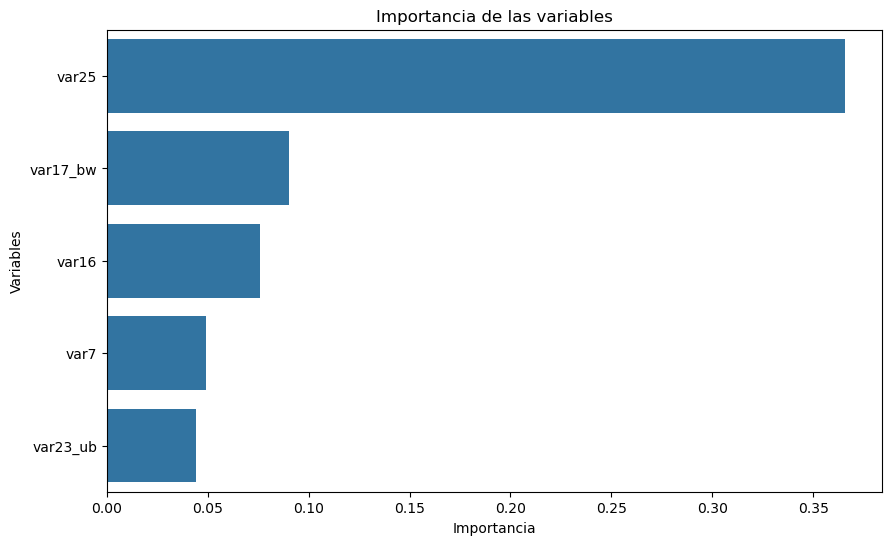

In [26]:
# Obtenemos las métricas más importantes según el clasificador de Decision Tree
importances = regularized_dt.feature_importances_
# Tomamos las 5 más importantes
indices = np.argsort(importances)[::-1][:5]
# Obtenemos los nombres de las variables más importantes
names = x_train.columns[indices]

print("Las 5 variables más importantes son:")
for i in range(5):
    print(f"{i + 1}. {names[i]} ({importances[indices[i]]})")

# Hacemos un gráfico de las 5 variables más importantes
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=names)
plt.title("Importancia de las variables")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()

# Pregunta 2:
Repite el ejercicio anterior usando normalización de los datos y compara los resultados.

In [27]:
# Impotamos el normalizador de datos robusto que es menos sensible a los outliers
from sklearn.preprocessing import RobustScaler

# Creamos el objeto robusto
scaler = RobustScaler()
# Ajustamos el objeto a los datos de train
scaler.fit(x_train)
# Transformamos los datos de train
x_train_scaled = scaler.transform(x_train)
# Transformamos los datos de test
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled

array([[ 0.87192118,  1.33965245, -1.47815602, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02216749, -1.28541338, -0.41591689, ...,  0.        ,
         0.        , -1.        ],
       [ 0.05418719, -0.78988942, -1.45144235, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.25862069, -1.5897841 ,  0.52907894, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88669951, -0.70721432, -0.17363881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.36945813, -0.3206951 ,  0.35061683, ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
x_test_scaled

array([[-1.56157635,  0.84886783,  0.35358501, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31773399,  0.44075829, -0.54948521, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37931034, -0.8883623 ,  0.33280772, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.64285714,  0.95997894,  0.24005194, ...,  0.        ,
         0.        , -1.        ],
       [ 1.05172414,  0.49763033,  1.54197199, ...,  0.        ,
         0.        ,  0.        ],
       [-1.25123153, -0.02790943, -1.04851127, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
# Implementamos el clasificador KNN
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)

# Miramos el score del clasificador en train para revisar que no haya overfitting
train_score_knn = round(knn.score(x_train_scaled, y_train), 3)

if train_score_knn < 1:
    print("No hay overfitting, el score en train es: ", train_score_knn)
else:
    print("Hay overfitting, el score en train es: ", train_score_knn)

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(knn.score(x_test_scaled, y_test), 3))

No hay overfitting, el score en train es:  0.85
El score en test es: 0.703


In [31]:
# Implementamos el clasificador de Decission Tree
dt = DecisionTreeClassifier(random_state = 42).fit(x_train_scaled, y_train)
y_pred_dt = dt.predict(x_test_scaled)

# Miramos el score del clasificador en train para revisar que no haya overfitting
train_score_dt = round(dt.score(x_train_scaled, y_train), 3)

if train_score_dt < 1:
    print("No hay overfitting, el score en train es:", train_score_dt)
else:
    print("Hay overfitting, el score en train es:", train_score_dt)

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(dt.score(x_test_scaled, y_test), 3))

Hay overfitting, el score en train es: 1.0
El score en test es: 0.782


Nuevamente, hay overfitting en el árbol de decisión, entonces lo vamos a regularizar para obtener un modelo comparable de forma justa con el KNN normalizado.

In [32]:
# Definimos de nuevo el Decision Tree con un max_depth

# Para esto tomamos la máxima profundidad del árbol de decisión con overfitting y tomamos un 80% de esa profundidad
max_depth = int(dt.get_depth()*0.8)
regularized_dt = DecisionTreeClassifier(max_depth = max_depth, random_state = 42).fit(x_train_scaled, y_train)
y_pred_regularized_dt = regularized_dt.predict(x_test_scaled)

# Miramos el score del clasificador en train para revisar que no haya overfitting
train_score_regularized_dt = round(regularized_dt.score(x_train_scaled, y_train), 3)

if train_score_regularized_dt < 1:
    print("No hay overfitting, el score en train es:", train_score_regularized_dt)
else:
    print("Hay overfitting, el score en train es:", train_score_regularized_dt)

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(regularized_dt.score(x_test_scaled, y_test), 3))

No hay overfitting, el score en train es: 0.996
El score en test es: 0.791


Vamos ahora entonces a comparar en torno a la métrica de ***precision*** los 4 modelos: KNN con y sin normalización de datos, y, Decision Tree con y sin normalización de datos.

In [33]:
# Calculamos la 'precision' del clasificador KNN y del clasificador Decision Tree regularizado
precision_knn_norm = round(precision_score(y_test, y_pred_knn), 3)
precision_dt_regularized_norm = round(precision_score(y_test, y_pred_regularized_dt), 3)

# Imprimimos los resultados
print("La 'precision' del clasificador KNN sin normalizar datos es:", precision_knn)
print("La 'precision' del clasificador KNN normalizando datos es:", precision_knn_norm)
print("La 'precision' del clasificador Decision Tree sin normalizar datos es:", precision_regularized_dt)
print("La 'precision' del clasificador Decision Tree normalizando datos es:", precision_dt_regularized_norm)

La 'precision' del clasificador KNN sin normalizar datos es: 0.575
La 'precision' del clasificador KNN normalizando datos es: 0.623
La 'precision' del clasificador Decision Tree sin normalizar datos es: 0.722
La 'precision' del clasificador Decision Tree normalizando datos es: 0.722


In [34]:
# Creamos un dataframe con los resultados donde los index son los nombres de los clasificadores y las columnas son los valores de 'precision'
resultados = pd.DataFrame({'KNN': [precision_knn, precision_knn_norm],
                          'Decision Tree': [precision_regularized_dt, precision_dt_regularized_norm]},
                          index=['Sin normalizar', 'Normalizando'])
# Imprimimos el dataframe
resultados

,KNN,Decision Tree
Sin normalizar,0.575,0.722
Normalizando,0.623,0.722


Vemos que como era de esperarse, con la normalización de datos se vió beneficiado el modelo KNN mejorando su métrica, pues este se basa en geometría y distancias para determinar los resultados. Mientras que el modelo de Decision Tree se mantuvo prácticamente igual, esto debido a que este modelo que se basa en reglas se separación y clasificación, no requiere normalización de datos.
El mejor sigue siendo entonces el Decision Tree con los datos con ó sin normalizar.

# Pregunta 3:
Usando GridSearchCV, identifica para un clasificador K-NN el número de vecinos entre 1 y 30 que optimiza el resultado usando como scoring la precision y con 10 folds para la validación cruzada. 

In [35]:
# Importamos la función de GridSearchCV
from sklearn.model_selection import GridSearchCV
# Definimos los parámetros a ajustar
param_grid = {'n_neighbors': list(range(1, 31))}

In [36]:
# Creamos el clasificador KNN
knn = KNeighborsClassifier()
# Creamos el objeto GridSearchCV optimizando la métrica de 'precision'
grid = GridSearchCV(knn, param_grid, cv=10, scoring='precision')

"""Ajustamos el modelo con los datos de entrenamiento escalados, pues en el anterior 
ejercicio se comprobó que el modelo KNN mejora con la normalización de los datos"""
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='precision')

In [37]:
# Obtenemos los mejores parámetros
print("Mejores parámetros: ", grid.best_params_)
# Obtenemos el mejor modelo
best_knn = grid.best_estimator_

# Revisamos el score del modelo en train para revisar que no haya overfitting
train_score_best_knn = round(best_knn.score(x_train_scaled, y_train), 3)
if train_score_best_knn < 1:
    print("No hay overfitting, el score en train es: ", train_score_best_knn)
else:
    print("Hay overfitting, el score en train es: ", train_score_best_knn)

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(best_knn.score(x_test_scaled, y_test), 3))

# Miramos la 'precision' del clasificador KNN
precision_best_knn = round(precision_score(y_test, best_knn.predict(x_test_scaled)), 3)
print("La 'precision' del clasificador KNN es:", precision_best_knn)

Mejores parámetros:  {'n_neighbors': 30}
No hay overfitting, el score en train es:  0.775
El score en test es: 0.765
La 'precision' del clasificador KNN es: 0.836


Tras aplicar el GridSearchCV, se ha encontrado que el mejor número de vecinos es 30, lo cual puede ser algo intuible considerando que las instancias de datos X son de alta dimensionalidad, es decir,
hay una gran cantidad de variables predictoras. Su métrica de precisión alcanzó un valor alrededor de 0.836, lo cual lo hace un modelo más competente.

# Pregunta 4:
Obten la matriz de confusión del clasificador óptimo anterior. ¿Cómo lees cada uno de los valores?. ¿Qué valor de precision y recall tiene el clasificador optimizado con precision?

Matriz de confusión del clasificador KNN:
 [[3546  205]
 [1206 1043]]


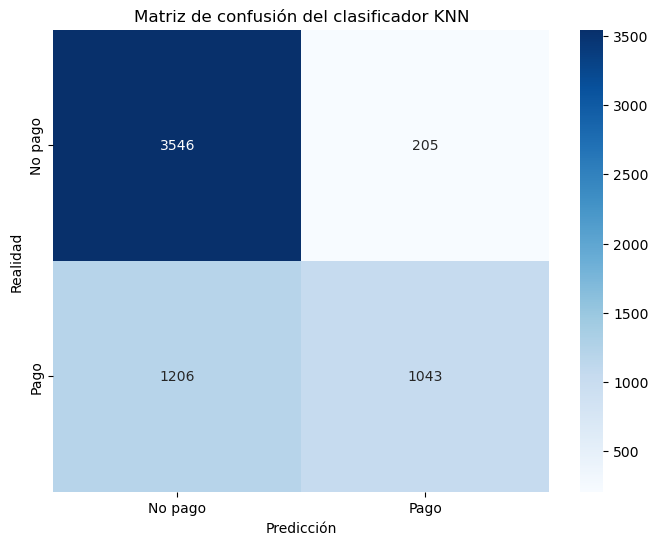

In [38]:
# Importamos la función para obtener la matriz de confusión
from sklearn.metrics import confusion_matrix

# Obtenemos la matriz de confusión del mejor clasificador KNN
cm_best_knn = confusion_matrix(y_test, best_knn.predict(x_test_scaled))
print("Matriz de confusión del clasificador KNN:\n", cm_best_knn)

# Convertimos la matriz de confusión a un dataframe para poder graficarla
cm_best_knn_df = pd.DataFrame(cm_best_knn, index=['No pago', 'Pago'], columns=['No pago', 'Pago'])
# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión del clasificador KNN')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

A continuación vemos como se lee dicha matriz de confusión en base a sus valores

In [39]:
TN = cm_best_knn[0][0]
TP = cm_best_knn[1][1]
FP = cm_best_knn[0][1]
FN = cm_best_knn[1][0]

print("Vemos según la matriz de confusión de las instancias de datos de test que:" \
"\n" \
"TN: ", TN, "son los casos de no pago que fueron clasificados correctamente como no pagos." \
"\n" \
"TP: ", TP, "son los casos de pago que fueron clasificados correctamente como pagos." \
"\n" \
"FP: ", FP, "son los casos de no pago que fueron clasificados incorrectamente como pagos." \
"\n" \
"FN: ", FN, "son los casos de pago que fueron clasificados incorrectamente como no pagos.")

Vemos según la matriz de confusión de las instancias de datos de test que:
TN:  3546 son los casos de no pago que fueron clasificados correctamente como no pagos.
TP:  1043 son los casos de pago que fueron clasificados correctamente como pagos.
FP:  205 son los casos de no pago que fueron clasificados incorrectamente como pagos.
FN:  1206 son los casos de pago que fueron clasificados incorrectamente como no pagos.


Ahora vamos a calcular las métricas de ***precision*** y ***recall*** manualmente considerando que sus ecuaciones son:
$$Precision = \frac{TP}{TP+FP}$$
$$Recall = \frac{TP}{TP+FN}$$

In [40]:
# Calculamos el 'precision'
precision_manual = round(TP / (TP + FP), 3)
print("La 'precision' calculada manualmente es:", precision_manual)
# Calculamos el 'recall'
recall_manual = round(TP / (TP + FN), 3)
print("El 'recall' calculado manualmente es:", recall_manual)

La 'precision' calculada manualmente es: 0.836
El 'recall' calculado manualmente es: 0.464


In [41]:
# Nada más para corroborar, calculamos el 'precision' y el 'recall' con las funciones de sklearn
from sklearn.metrics import precision_score, recall_score

# Calculamos el 'precision' con la función de sklearn
precision_sklearn = round(precision_score(y_test, best_knn.predict(x_test_scaled)), 3)
print("La 'precision' calculada con sklearn es:", precision_sklearn)

# Calculamos el 'recall' con la función de sklearn
recall_sklearn = round(recall_score(y_test, best_knn.predict(x_test_scaled)), 3)
print("El 'recall' calculado con sklearn es:", recall_sklearn)

La 'precision' calculada con sklearn es: 0.836
El 'recall' calculado con sklearn es: 0.464


In [42]:
# Comparamos los resultados
if precision_manual == precision_sklearn and recall_manual == recall_sklearn:
    print("Los resultados son iguales")
else:
    print("Los resultados son diferentes")
    if precision_manual != precision_sklearn:
        print("El 'precision' calculado manualmente es diferente al calculado con sklearn")
    if recall_manual != recall_sklearn:
        print("El 'recall' calculado manualmente es diferente al calculado con sklearn")

Los resultados son iguales


# Pregunta 5:
Construye ahora una red neuronal usando MLPClassifier de dos capas. Prueba diferente número de neuronas por capa. ¿Afecta al resultado?

Para decidir inicialmente una buena arquitectura para un Multi-Layer Perceptron Classifier consideremos que según el [código fuente](https://github.com/scikit-learn/scikit-learn/blob/ef5cb84a/sklearn/neural_network/multilayer_perceptron.py#L318) de Scikit-Learn, esta función automáticamente determina la cantidad de neuronas de entrada y de salida en base a las dimensiones de los datos X y las etiquetas Y. Por lo tanto la arquitectura de las capas ocultas se definirá considerando eso. 
Se van a probar 3 arquitecturas, siguiendo el estilo de pirámide, donde en la primera capa tenemos más neuronas, y en la segunda menos neuronas, tal que:
1) Modelo base con:
    - Primera Capa: 64 neuronas.
    - Segunda Capa: 32 neuronas.
2) Modelo más complejo con:
    - Primera Capa: 80 neuronas.
    - Segunda Capa: 40 neuronas.
3) Modelo más simple con:
    - Primera Capa: 32 neuronas.
    - Segunda Capa: 16 neuronas.

In [43]:
# Preparamos el diccionario de parámetros para el GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(64, 32), (80, 40), (32, 16)],
}

# Creamos el clasificador MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 1000, random_state = 42)
# Creamos el objeto GridSearchCV optimizando la métrica de 'precision' y con solo 2 folds por coste computacional
grid = GridSearchCV(mlp, param_grid, cv=2, scoring='precision')
# Ajustamos el modelo con los datos de entrenamiento escalados
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'hidden_layer_sizes': [(64, 32), (80, 40), (32, 16)]},
             scoring='precision')

In [44]:
# Obtenemos el informe de los modelos y lo convertimos a un dataframe
grid_results = pd.DataFrame(grid.cv_results_).iloc[:,5:]
top_parameters = grid.best_params_
print("Parámetros del mejor modelo:", top_parameters)
grid_results

Parámetros del mejor modelo: {'hidden_layer_sizes': (32, 16)}


,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'hidden_layer_sizes': (64, 32)}",0.712920,0.710112,0.711516,0.001404,3
1,"{'hidden_layer_sizes': (80, 40)}",0.719507,0.720679,0.720093,0.000586,2
2,"{'hidden_layer_sizes': (32, 16)}",0.737511,0.710262,0.723887,0.013624,1


Vemos que el mejor modelo resultó ser el de 32 neuronas en la primera capa y 16 en la segunda. En general, vemos que la cantidad de neuronas por capa tiene influencia en el resultado, pero para este escenario probado, es muy ligera la diferencia, aunque también hay que considerar que el número de folds para cross validation fue muy baja.

Desde mi intuición y conocimiento teórico del tema, al tener a la salida una capa de una sola neurona (pues es clasificación binaria), tener arquitecturas más complejas puede que introduzca un poco más de ruido en el cálculo de salida al que llegan muchos datos de las neuronas de la última capa oculta. Por lo que tener una salida un poco más sencilla beneficia mejor a esa única neurona de salida.

No hay overfitting, el score en train es:  0.908
El score en test es: 0.851
La 'precision' del clasificador MLP es: 0.806
Matriz de confusión del clasificador MLP:
 [[3323  428]
 [ 468 1781]]


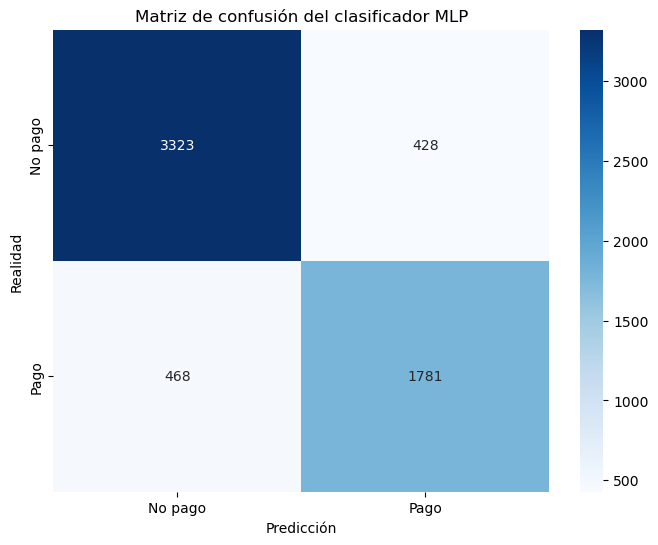

In [45]:
# Tomamos el mejor modelo
best_mlp = grid.best_estimator_

# Miramos el accuracy score del clasificador en train para revisar que no haya overfitting
train_score_best_mlp = round(best_mlp.score(x_train_scaled, y_train), 3)
if train_score_best_mlp < 1:
    print("No hay overfitting, el score en train es: ", train_score_best_mlp)
else:
    print("Hay overfitting, el score en train es: ", train_score_best_mlp)

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(best_mlp.score(x_test_scaled, y_test), 3))

# Miramos la 'precision' del clasificador MLP
precision_best_mlp = round(precision_score(y_test, best_mlp.predict(x_test_scaled)), 3)
print("La 'precision' del clasificador MLP es:", precision_best_mlp)

# Obtenemos la matriz de confusión del mejor clasificador MLP
cm_best_mlp = confusion_matrix(y_test, best_mlp.predict(x_test_scaled))
print("Matriz de confusión del clasificador MLP:\n", cm_best_mlp)

# Convertimos la matriz de confusión a un dataframe para poder graficarla
cm_best_mlp_df = pd.DataFrame(cm_best_mlp, index=['No pago', 'Pago'], columns=['No pago', 'Pago'])
# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_mlp_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión del clasificador MLP')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Pregunta 6:
GradientBoostingClasifier es uno de los métodos de scikit-learn que mejor resultados suelen producir. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate. ¿Qué learning rate produce un resultado óptimo usando recall?

In [46]:
# Importamos el Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Definimos el diccionario de parámetros para el GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
}

# Creamos el clasificador Gradient Boosting
gb = GradientBoostingClassifier(random_state = 42)
# Creamos el objeto GridSearchCV optimizando la métrica de 'recall' y con 2 folds por coste computacional
grid = GridSearchCV(gb, param_grid, cv=2, scoring='recall')
"""Ajustamos el modelo con los datos de entrenamiento sin escalar, ya que el Gradient Boosting 
no necesita normalización, al ser un modelo basado en árboles de decisión"""
grid.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]},
             scoring='recall')

In [47]:
# Obtenemos el informe de los modelos y lo convertimos a un dataframe
grid_results = pd.DataFrame(grid.cv_results_).iloc[:,5:]
top_parameters = grid.best_params_
print("Parámetros del mejor modelo:", top_parameters)
grid_results

Parámetros del mejor modelo: {'learning_rate': 0.1}


,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,{'learning_rate': 0.05},0.776790,0.786127,0.781458,0.004669,6
1,{'learning_rate': 0.1},0.787461,0.795242,0.791352,0.003891,1
2,{'learning_rate': 0.15},0.783682,0.794131,0.788906,0.005225,3
3,{'learning_rate': 0.2},0.785016,0.795020,0.790018,0.005002,2
4,{'learning_rate': 0.25},0.781236,0.792352,0.786794,0.005558,5
5,{'learning_rate': 0.3},0.782792,0.792130,0.787461,0.004669,4


No hay overfitting, el score en train es:  0.874
El score en test es: 0.865
La 'precision' del clasificador Gradient Boosting es: 0.837
El 'recall' del clasificador Gradient Boosting es: 0.793
Matriz de confusión del clasificador Gradient Boosting:
 [[3404  347]
 [ 466 1783]]


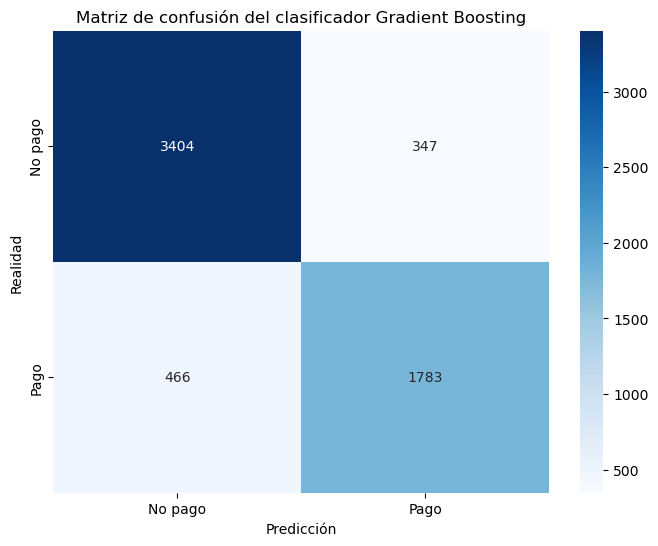

In [48]:
# Obtenemos el mejor modelo
best_gb = grid.best_estimator_
# Miramos el accuracy score del clasificador en train para revisar que no haya overfitting
train_score_best_gb = round(best_gb.score(x_train, y_train), 3)
if train_score_best_gb < 1:
    print("No hay overfitting, el score en train es: ", train_score_best_gb)
else:
    print("Hay overfitting, el score en train es: ", train_score_best_gb)

# Miramos el accuracy score del clasificador en test
print("El score en test es:", round(best_gb.score(x_test, y_test), 3))

# Miramos la 'precision' del clasificador Gradient Boosting
precision_best_gb = round(precision_score(y_test, best_gb.predict(x_test)), 3)
print("La 'precision' del clasificador Gradient Boosting es:", precision_best_gb)

# Miramos también el 'recall' del clasificador Gradient Boosting
recall_best_gb = round(recall_score(y_test, best_gb.predict(x_test)), 3)
print("El 'recall' del clasificador Gradient Boosting es:", recall_best_gb)

# Obtenemos la matriz de confusión del mejor clasificador Gradient Boosting
cm_best_gb = confusion_matrix(y_test, best_gb.predict(x_test))
print("Matriz de confusión del clasificador Gradient Boosting:\n", cm_best_gb)

# Convertimos la matriz de confusión a un dataframe para poder graficarla
cm_best_gb_df = pd.DataFrame(cm_best_gb, index=['No pago', 'Pago'], columns=['No pago', 'Pago'])
# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_gb_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión del clasificador Gradient Boosting')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Según los resultados obtenidos con el GridSearchCV, el mejor Gradient Boosting Classifier se obtuvó con un learning rate $\alpha = 0.1$

# Pregunta 7:
Usando la matriz de confusión de los tres casos (GradientBoosting, MLP y K-NN) y derivando las métricas que te parezcan oportunas ¿Qué clasificador de los 3 seleccionarias y por qué?

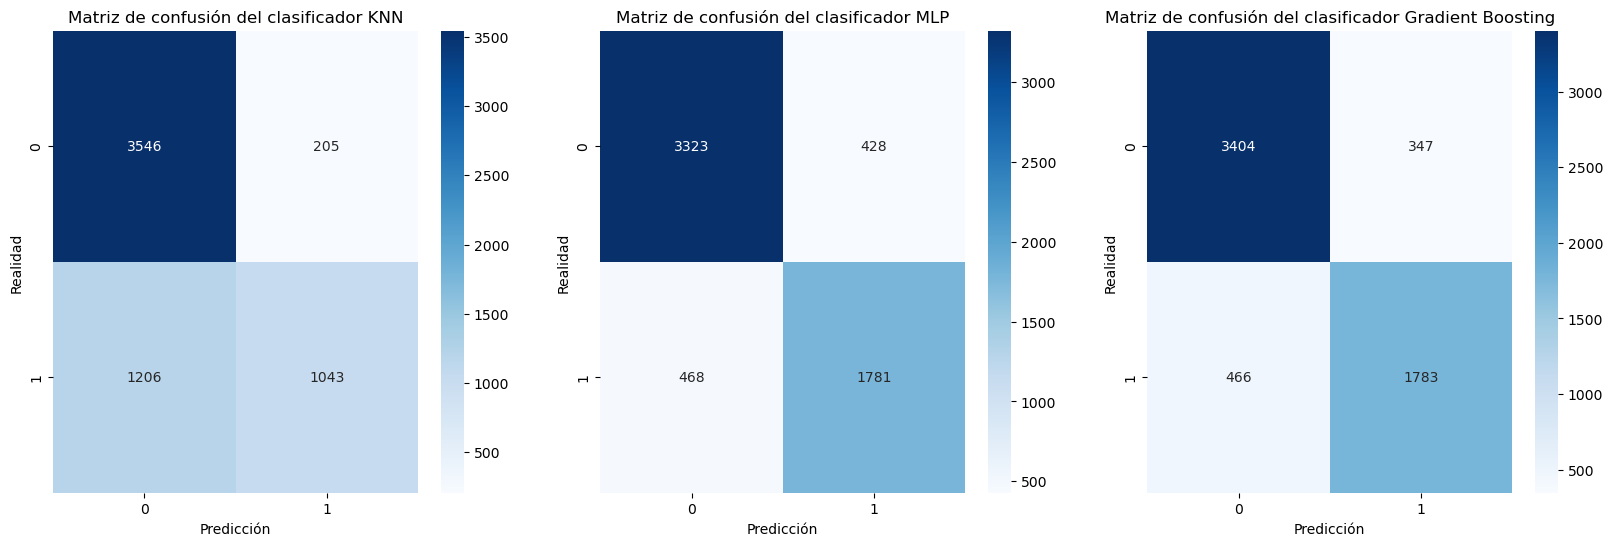

In [49]:
""" Para este paso final es hora de comparar los mejores modelos de KNN, MLP y Gradient Boosting obtenidos 
con GridSearchCV, y ver cuál es el mejor modelo para el problema de clasificación de pagos de microcréditos."""

classifiers_names = ['KNN', 'MLP', 'Gradient Boosting']
classifiers = [best_knn, best_mlp, best_gb]
cm_df_list = [cm_best_knn, cm_best_mlp, cm_best_gb]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, clf in enumerate(classifiers):
    cm_df = cm_df_list[i]
    # Graficamos la matriz de confusión
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de confusión del clasificador {classifiers_names[i]}')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Realidad')

In [50]:
# Comparamos ahora las métricas de 'precision' de los 3 clasificadores
precision_list = [precision_best_knn, precision_best_mlp, precision_best_gb]

for i, clf in enumerate(classifiers_names):
    print(f"La 'precision' del clasificador {clf} es:", precision_list[i])

La 'precision' del clasificador KNN es: 0.836
La 'precision' del clasificador MLP es: 0.806
La 'precision' del clasificador Gradient Boosting es: 0.837


Ahora bien, a pesar de que desde la primera pregunta se definió la métrica de *precision* como la más importante, debido a razones de proteger las finanzas del banco al conceder microcréditos, la métrica de *recall* en realidad es otra que también tiene relevancia, pues su ecuación es la siguiente:

$$Recall = \frac{TP}{TP+FN}$$

Y cuando esta métrica es más grande, implica que el modelo indica mejor los clientes a los cuáles se les puede conceder microcréditos, lo cual ayuda a que el banco no pierda oportunidades de mejorar sus ganancias al conceder microcréditos a gente que muy probablemente si los pagará.

In [51]:
# Comparamos ahora las métricas de 'recall' de los 3 clasificadores
recall_best_knn = round(recall_score(y_test, best_knn.predict(x_test_scaled)), 3)
recall_best_mlp = round(recall_score(y_test, best_mlp.predict(x_test_scaled)), 3)
# Recordar que el recall del Gradient Boosting ya lo tenemos calculado

recall_list = [recall_best_knn, recall_best_mlp, recall_best_gb]
for i, clf in enumerate(classifiers_names):
    print(f"El 'recall' del clasificador {clf} es:", recall_list[i])

El 'recall' del clasificador KNN es: 0.464
El 'recall' del clasificador MLP es: 0.792
El 'recall' del clasificador Gradient Boosting es: 0.793


Tras analizar que la diagonal de la matriz de confusión del Gradient Boosting es la mejor/más intensa (esto implica también mejor accuracy); y que en las 2 métricas elegidas el Gradient Boosting Classifier tiene mejor desempeño tanto en ***precision*** como en ***recall***, además de que es computacionalmente menos costoso que el Multi-Layer Perceptron Classifier, se concluye que **EL MEJOR MODELO ES EL GRADIENT BOOSTING CLASSIFIER**.